In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.optim as optim
from torch.nn import CrossEntropyLoss, Conv2d, Sequential, BatchNorm2d
from torch.utils.data import DataLoader

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from torchinfo import summary

from ActiveShiftLayer import ASL
from util import test_loss, train_NN

In [2]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
print(device)

cuda


In [3]:
batch_size = 100

#transform images into normalized tensors
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])

train_dataset = datasets.MNIST(
    "./data/MNIST",
    download=True,
    train=True,
    transform=transform,
)

test_dataset = datasets.MNIST(
    "./data/MNIST",
    download=True,
    train=False,
    transform=transform,
)

train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=1,
    pin_memory=True,
)

test_dataloader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=1,
    pin_memory=True,
)

In [4]:
from Models import LeNet

input_shape = (batch_size, 1, 28, 28)

LeNN = LeNet(input_shape, num_labels=10)

summary(LeNN, input_shape)

Layer (type:depth-idx)                   Output Shape              Param #
LeNet                                    [100, 10]                 --
├─Sequential: 1-1                        --                        --
│    └─Conv2d: 2-1                       [100, 6, 28, 28]          156
│    └─BatchNorm2d: 2-2                  [100, 6, 28, 28]          12
│    └─Tanh: 2-3                         [100, 6, 28, 28]          --
│    └─AvgPool2d: 2-4                    [100, 6, 14, 14]          --
│    └─Conv2d: 2-5                       [100, 16, 14, 14]         2,416
│    └─BatchNorm2d: 2-6                  [100, 16, 14, 14]         32
│    └─Tanh: 2-7                         [100, 16, 14, 14]         --
│    └─AvgPool2d: 2-8                    [100, 16, 7, 7]           --
│    └─Flatten: 2-9                      [100, 784]                --
│    └─Linear: 2-10                      [100, 120]                94,200
│    └─Tanh: 2-11                        [100, 120]                --
│    └─

In [5]:
criterion = CrossEntropyLoss()
optimizer = optim.SGD(LeNN.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.5)

In [6]:
leStats = train_NN(LeNN, train_dataloader,
        test_dataloader, epochs=4, optimizer=optimizer, criterion=criterion,
        scheduler=scheduler, device=device, steps_to_test=200, print_test=True)

[1,   200] train_loss: 0.483
test_loss: 0.165, test_accuracy: 94.97
[1,   400] train_loss: 0.161
test_loss: 0.111, test_accuracy: 96.55
[1,   600] train_loss: 0.127
test_loss: 0.102, test_accuracy: 96.92
[2,   200] train_loss: 0.079
test_loss: 0.089, test_accuracy: 97.39
[2,   400] train_loss: 0.072
test_loss: 0.067, test_accuracy: 97.86
[2,   600] train_loss: 0.064
test_loss: 0.065, test_accuracy: 98.1
[3,   200] train_loss: 0.046
test_loss: 0.052, test_accuracy: 98.38
[3,   400] train_loss: 0.042
test_loss: 0.052, test_accuracy: 98.43
[3,   600] train_loss: 0.038
test_loss: 0.048, test_accuracy: 98.53
[4,   200] train_loss: 0.030
test_loss: 0.044, test_accuracy: 98.71
[4,   400] train_loss: 0.032
test_loss: 0.047, test_accuracy: 98.57
[4,   600] train_loss: 0.030
test_loss: 0.045, test_accuracy: 98.49


In [3]:
plt.plot(leStats[0])
plt.show()
plt.plot(leStats[1])
plt.show()
plt.plot(leStats[2])
plt.show()
plt.plot(leStats[3])
plt.show()

NameError: name 'leStats' is not defined

In [4]:
from Models import LeASLNet

input_shape = (batch_size, 1, 28, 28)

LeASLNN = LeASLNet(input_shape, 10, device, expansion_rate=1)

summary(LeASLNN, input_shape)

Layer (type:depth-idx)                   Output Shape              Param #
LeASLNet                                 [100, 10]                 --
├─Sequential: 1-1                        --                        --
│    └─Conv2d: 2-1                       [100, 6, 28, 28]          156
│    └─BatchNorm2d: 2-2                  [100, 6, 28, 28]          12
│    └─Tanh: 2-3                         [100, 6, 28, 28]          --
│    └─AvgPool2d: 2-4                    [100, 6, 14, 14]          --
│    └─CSC_block: 2-5                    [100, 16, 14, 14]         --
│    │    └─Sequential: 3-1              --                        108
│    │    └─Conv2d: 3-2                  [100, 16, 14, 14]         112
│    └─Tanh: 2-6                         [100, 16, 14, 14]         --
│    └─AvgPool2d: 2-7                    [100, 16, 7, 7]           --
│    └─Flatten: 2-8                      [100, 784]                --
│    └─Linear: 2-9                       [100, 120]                94,200
│    └─T

In [5]:
criterion = CrossEntropyLoss()
optimizer = optim.SGD(LeASLNN.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.2)

In [6]:
leASLStats = train_NN(LeASLNN, train_dataloader,
        test_dataloader, epochs=12, optimizer=optimizer, criterion=criterion,
        scheduler=scheduler, device=device, steps_to_test=200, print_test=True)

[1,   200] train_loss: 0.489
test_loss: 0.222, test_accuracy: 93.14
[1,   400] train_loss: 0.162
test_loss: 0.138, test_accuracy: 95.72
[1,   600] train_loss: 0.111
test_loss: 0.105, test_accuracy: 96.66
[2,   200] train_loss: 0.064
test_loss: 0.058, test_accuracy: 98.2
[2,   400] train_loss: 0.057
test_loss: 0.053, test_accuracy: 98.39
[2,   600] train_loss: 0.059
test_loss: 0.056, test_accuracy: 98.31
[3,   200] train_loss: 0.046
test_loss: 0.050, test_accuracy: 98.45
[3,   400] train_loss: 0.047
test_loss: 0.048, test_accuracy: 98.49
[3,   600] train_loss: 0.045
test_loss: 0.047, test_accuracy: 98.46
[4,   200] train_loss: 0.043
test_loss: 0.047, test_accuracy: 98.52
[4,   400] train_loss: 0.044
test_loss: 0.047, test_accuracy: 98.53
[4,   600] train_loss: 0.043
test_loss: 0.047, test_accuracy: 98.53
[5,   200] train_loss: 0.042
test_loss: 0.047, test_accuracy: 98.53
[5,   400] train_loss: 0.044
test_loss: 0.047, test_accuracy: 98.53
[5,   600] train_loss: 0.042
test_loss: 0.047, te

In [7]:
train_time = LeASLNN.train_time
print(np.mean(train_time))

11.783975677416668


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


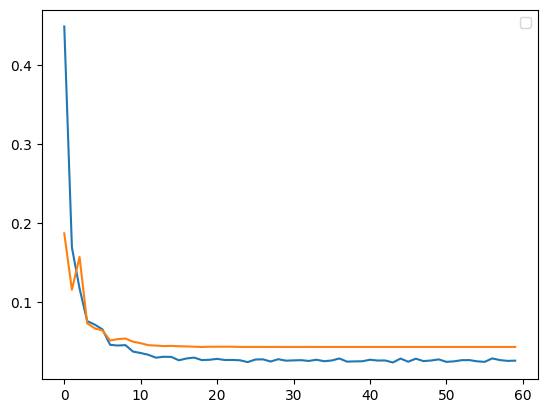

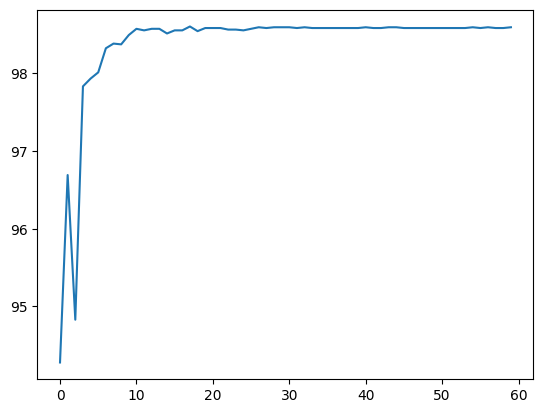

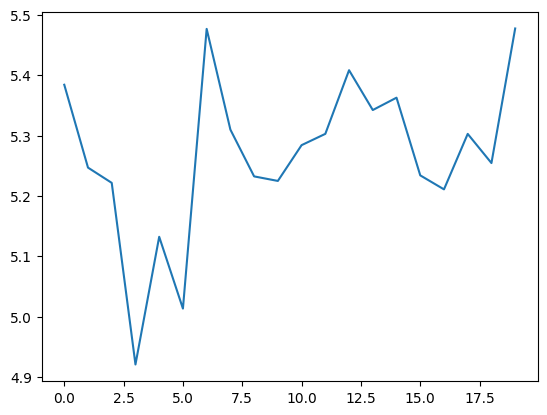

In [9]:
plt.plot(LeASLNN.train_loss)
plt.plot(LeASLNN.test_loss)
plt.legend()
plt.show()
plt.plot(LeASLNN.test_accuracy)
plt.show()
plt.plot(LeASLNN.train_time)
plt.show()

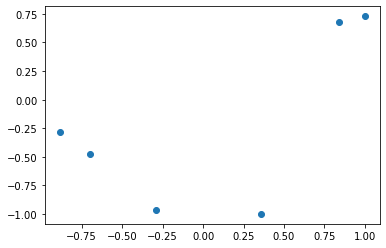

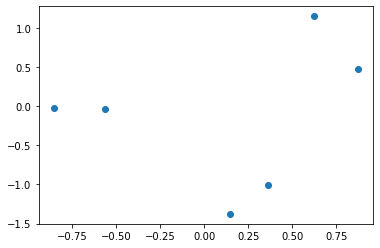

In [12]:
points = LeASLNN.NN[4].NN[3].shifts.detach().to("cpu").numpy()
initial_points = LeASLNN.NN[4].NN[3].initial.detach().to("cpu").numpy()
plt.scatter(initial_points[:, 0], initial_points[:,1])
plt.show()
plt.scatter(points[:, 0], points[:,1])
plt.show()

In [4]:
from Models import LeDepthNet

input_shape = (100, 1, 28, 28)

LeDepthNN = LeDepthNet(input_shape, 10, device)

summary(LeDepthNN, input_shape)

Layer (type:depth-idx)                   Output Shape              Param #
LeDepthNet                               [100, 10]                 --
├─Sequential: 1-1                        --                        --
│    └─Conv2d: 2-1                       [100, 6, 28, 28]          156
│    └─BatchNorm2d: 2-2                  [100, 6, 28, 28]          12
│    └─Tanh: 2-3                         [100, 6, 28, 28]          --
│    └─AvgPool2d: 2-4                    [100, 6, 14, 14]          --
│    └─Depth_wise_block: 2-5             [100, 16, 14, 14]         --
│    │    └─Sequential: 3-1              --                        226
│    └─Tanh: 2-6                         [100, 16, 14, 14]         --
│    └─AvgPool2d: 2-7                    [100, 16, 7, 7]           --
│    └─Flatten: 2-8                      [100, 784]                --
│    └─Linear: 2-9                       [100, 120]                94,200
│    └─Tanh: 2-10                        [100, 120]                --
│    └─Li

In [5]:
criterion = CrossEntropyLoss()
optimizer = optim.SGD(LeDepthNN.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.5)

In [6]:
leDepthStats = train_NN(LeDepthNN, train_dataloader,
        test_dataloader, epochs=4, optimizer=optimizer, criterion=criterion,
        scheduler=scheduler, device=device, steps_to_test=200, print_test=True)

[1,   200] train_loss: 0.479
test_loss: 0.139, test_accuracy: 95.8
[1,   400] train_loss: 0.128
test_loss: 0.090, test_accuracy: 97.2
[1,   600] train_loss: 0.089
test_loss: 0.078, test_accuracy: 97.61
[2,   200] train_loss: 0.051
test_loss: 0.050, test_accuracy: 98.38
[2,   400] train_loss: 0.054
test_loss: 0.051, test_accuracy: 98.39
[2,   600] train_loss: 0.052
test_loss: 0.045, test_accuracy: 98.59
[3,   200] train_loss: 0.032
test_loss: 0.039, test_accuracy: 98.73
[3,   400] train_loss: 0.032
test_loss: 0.040, test_accuracy: 98.66
[3,   600] train_loss: 0.034
test_loss: 0.037, test_accuracy: 98.71
[4,   200] train_loss: 0.025
test_loss: 0.037, test_accuracy: 98.75
[4,   400] train_loss: 0.024
test_loss: 0.035, test_accuracy: 98.76
[4,   600] train_loss: 0.025
test_loss: 0.035, test_accuracy: 98.77


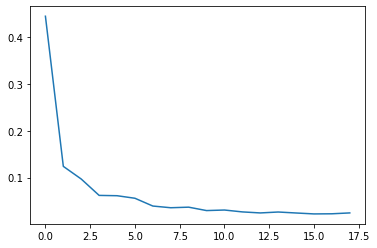

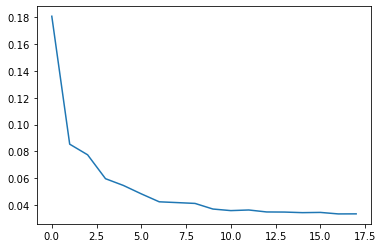

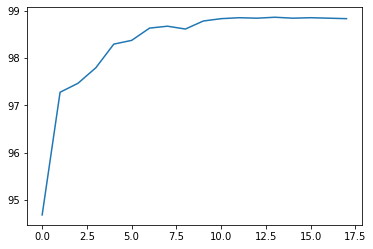

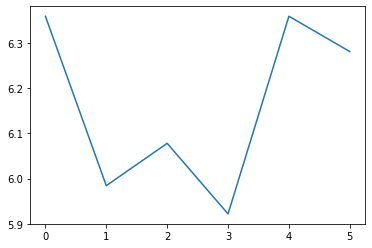

In [16]:
plt.plot(leDepthStats[0])
plt.show()
plt.plot(leDepthStats[1])
plt.show()
plt.plot(leDepthStats[2])
plt.show()
plt.plot(leDepthStats[3])
plt.show()